In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import t
from statsmodels.tsa.seasonal import STL
import pandas as pd
from matplotlib import style
import statsmodels.api as sm

In [2]:
data=pd.read_csv('C://Users//Admin//OneDrive//Desktop//HPE//data.csv')
data['timestamp'] = pd.to_datetime(data['timestamp'])
data.set_index('timestamp', inplace=True)

In [3]:
df=data.iloc[:,0::2]

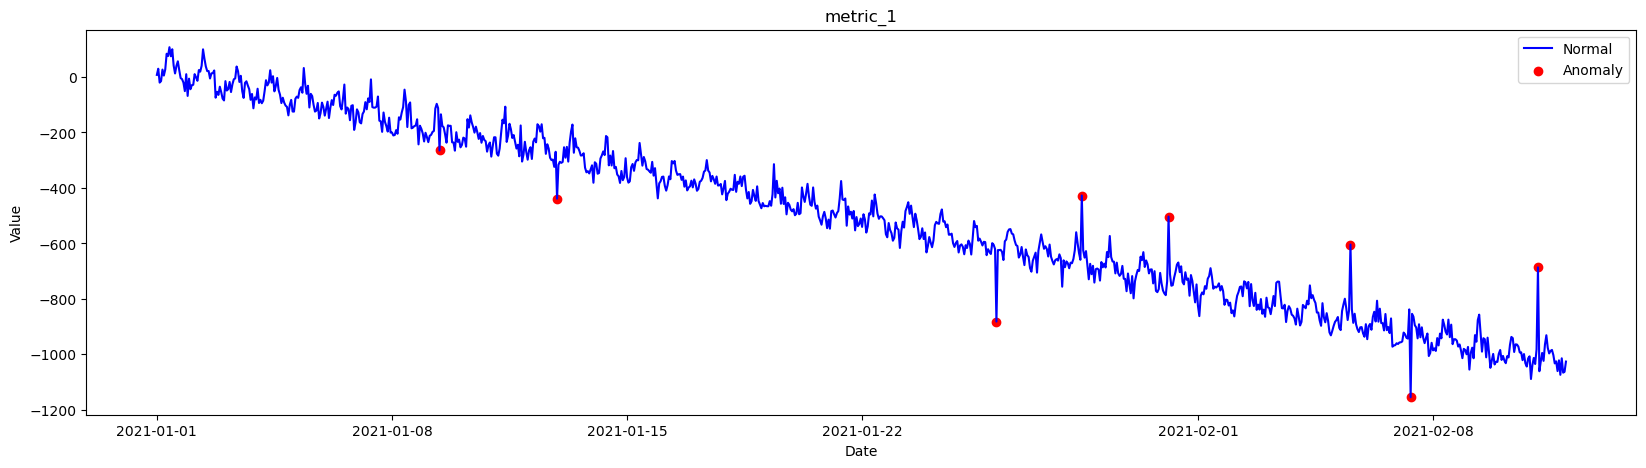

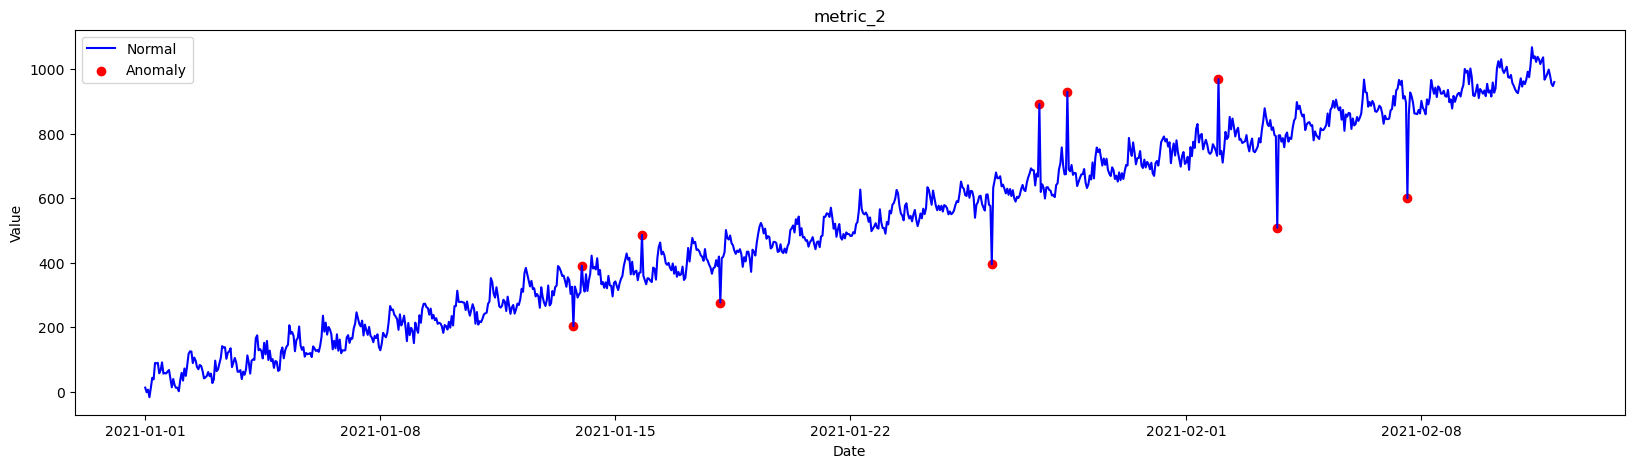

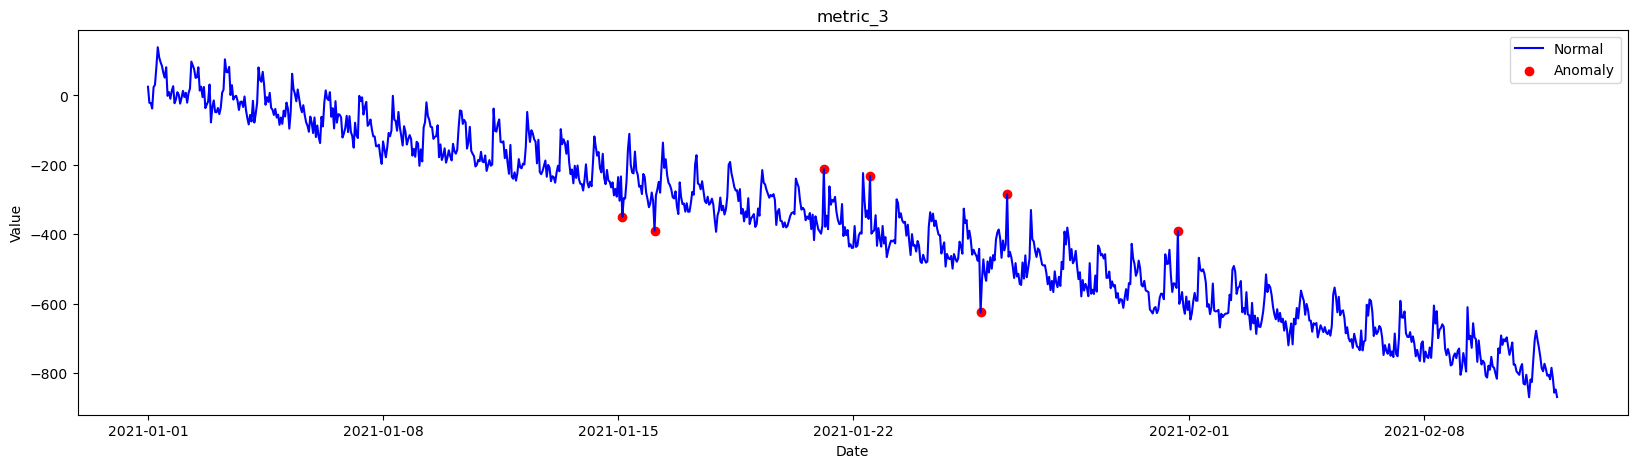

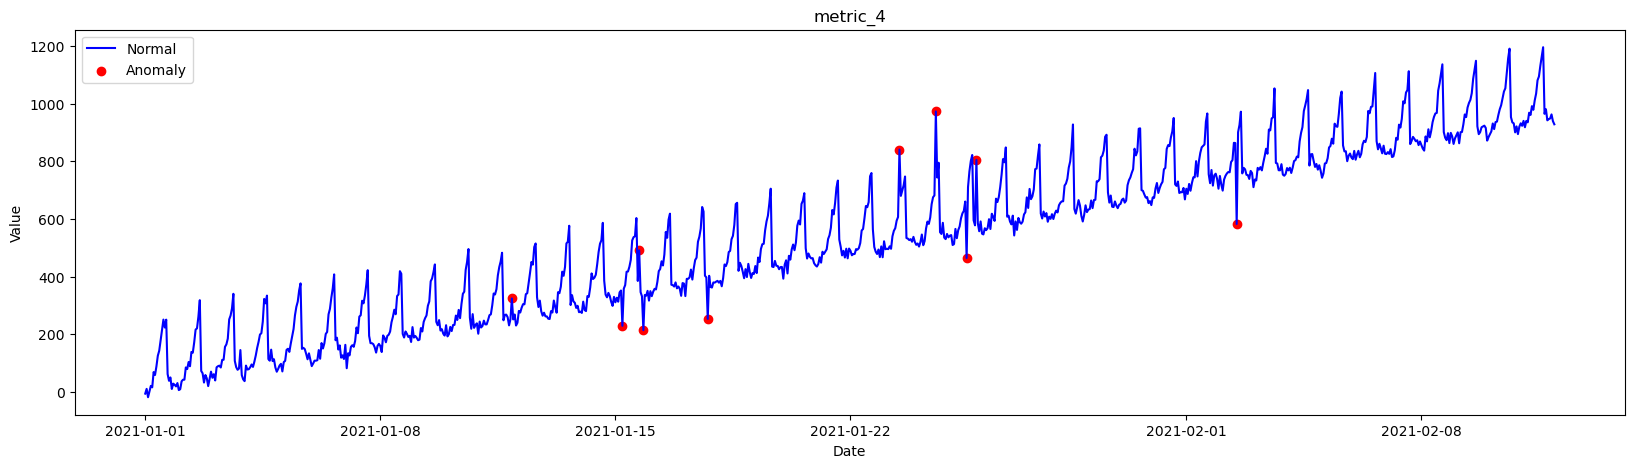

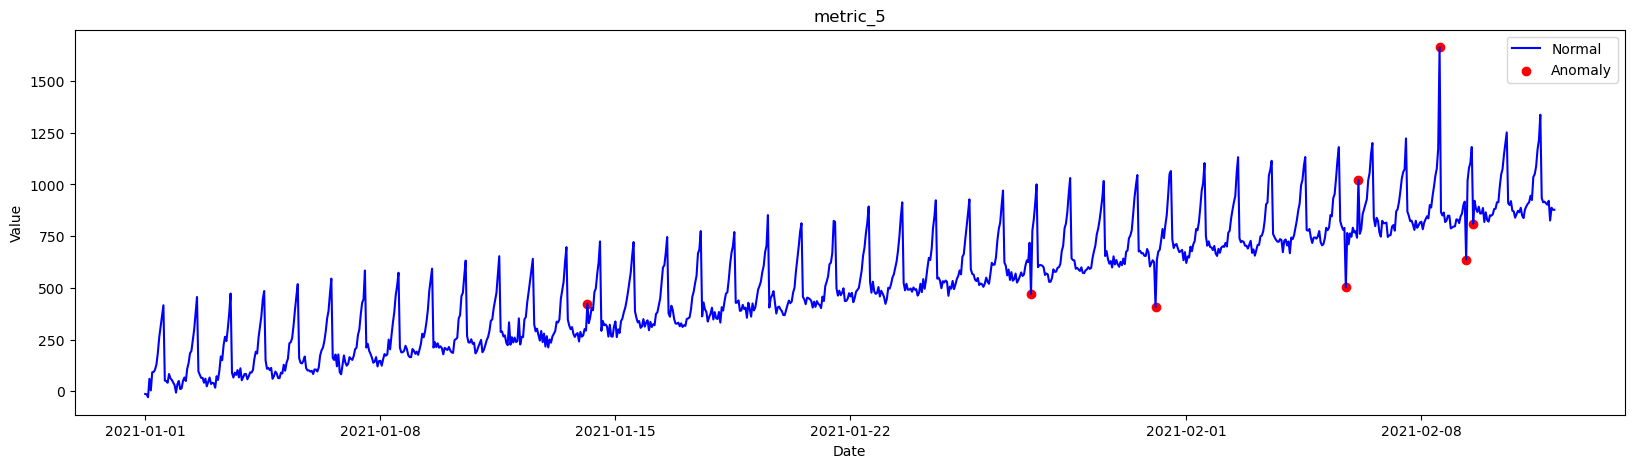

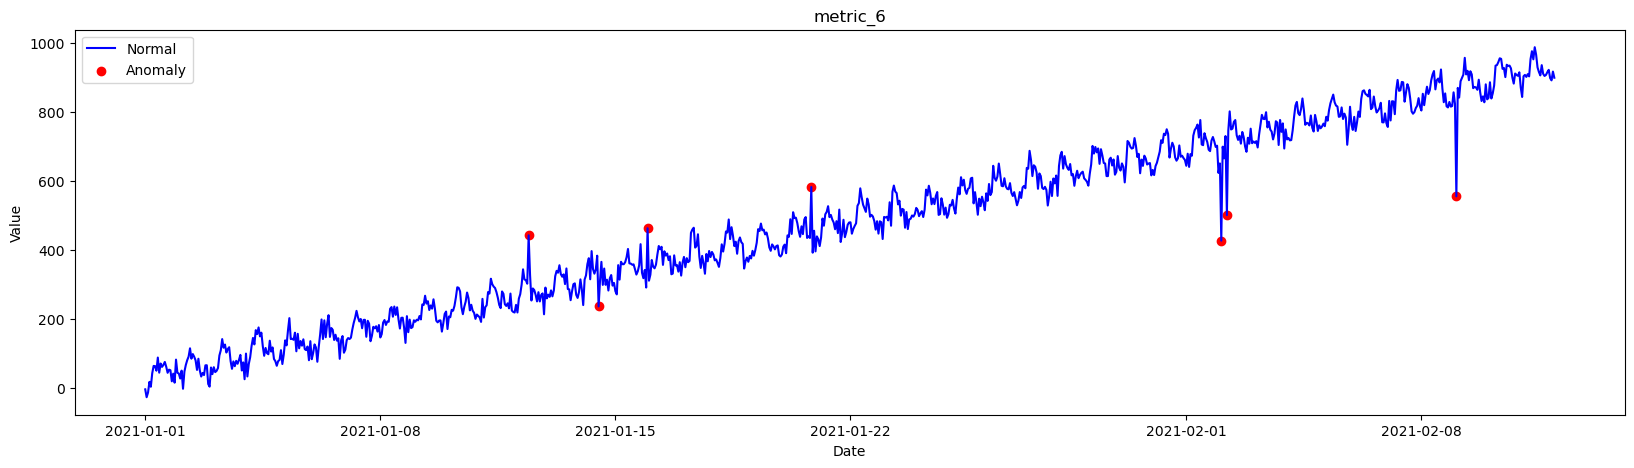

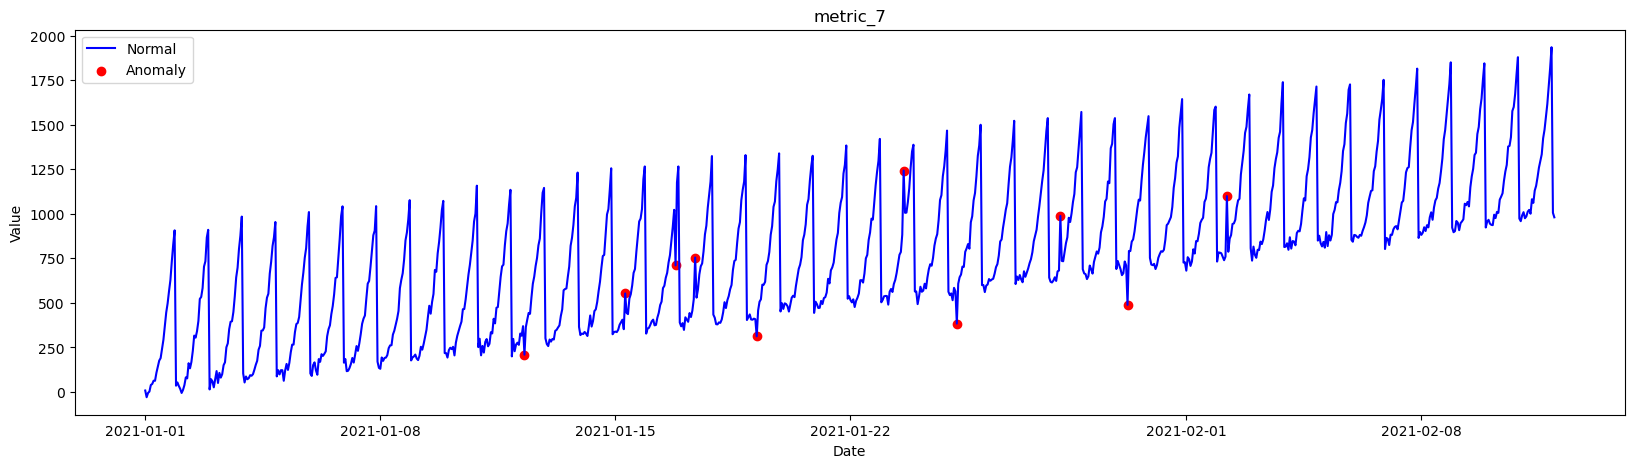

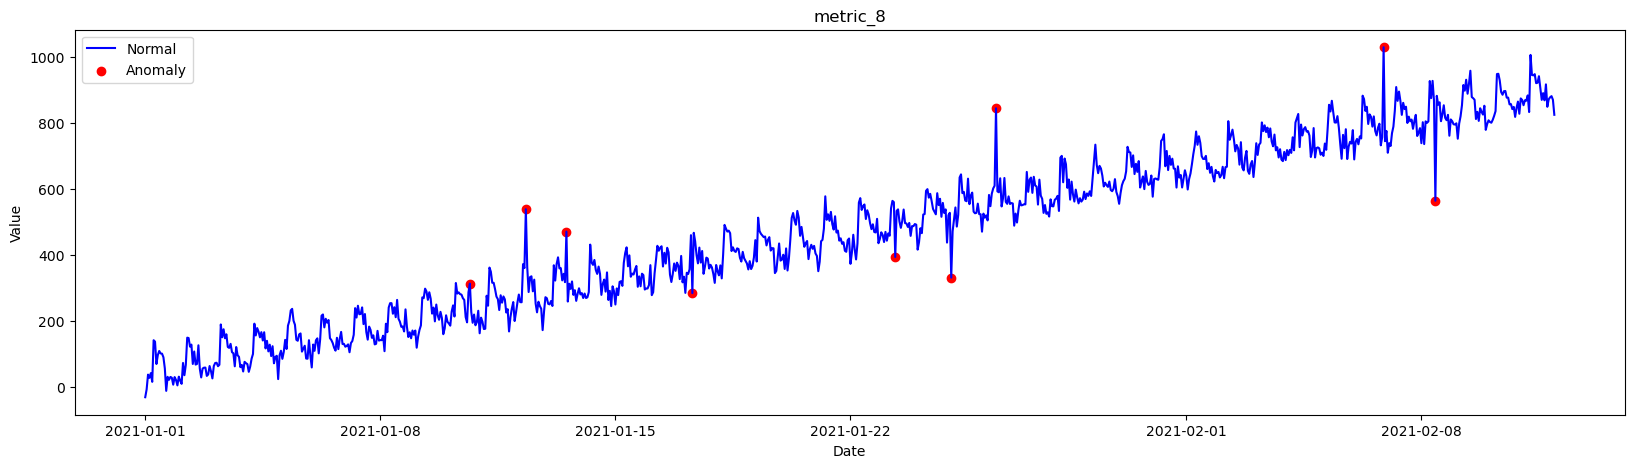

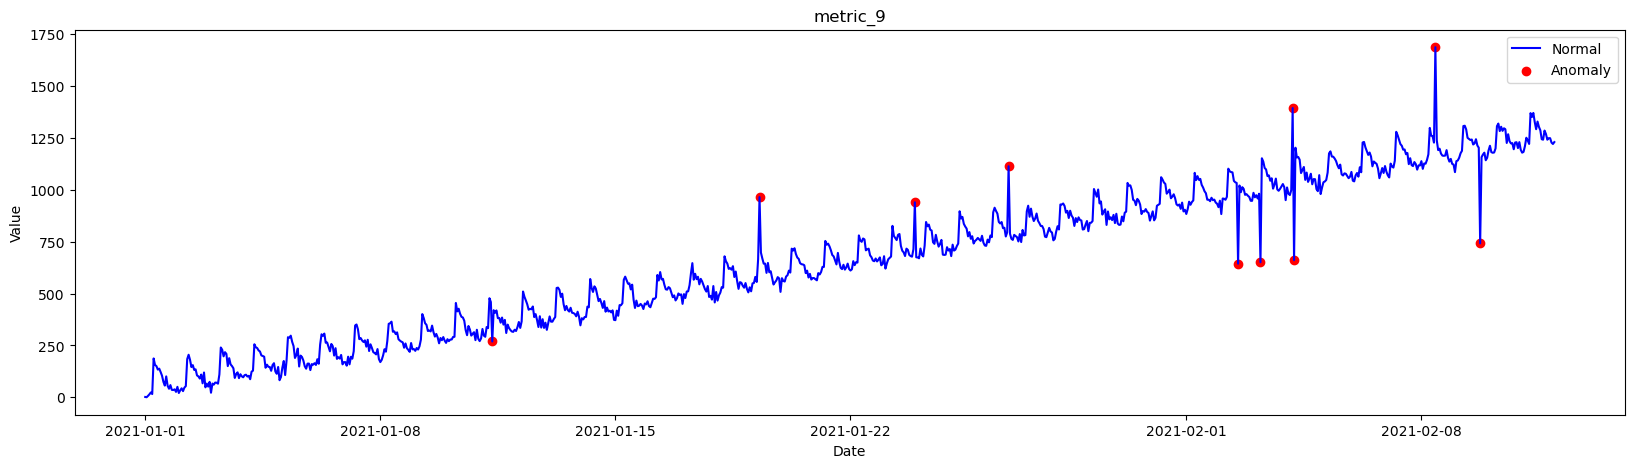

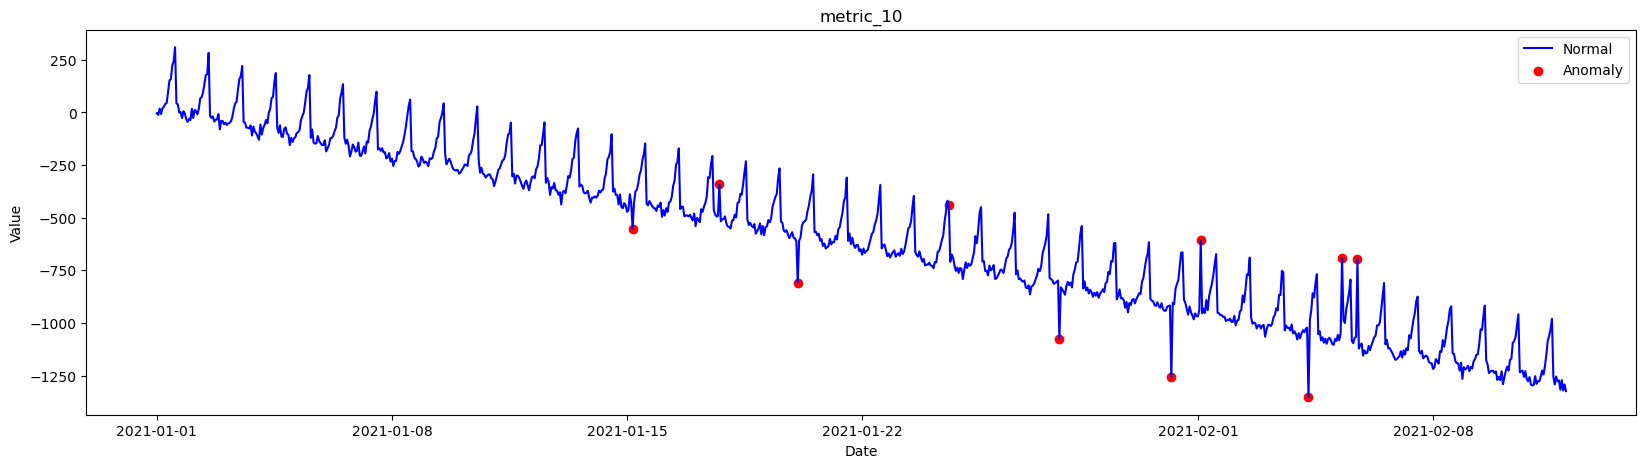

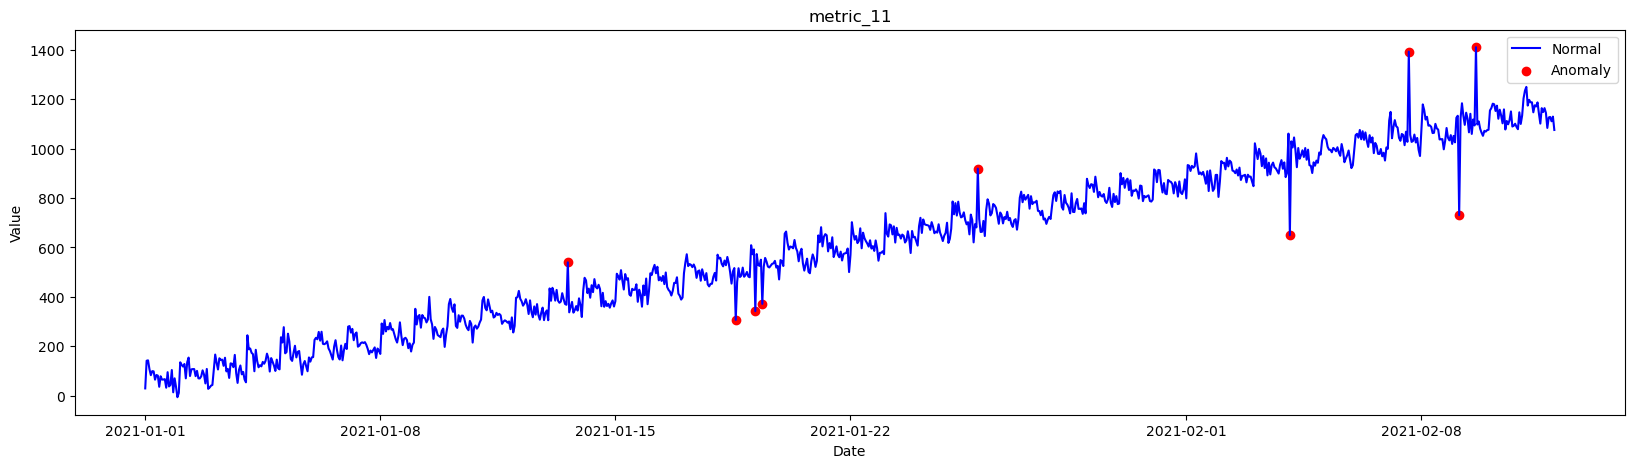

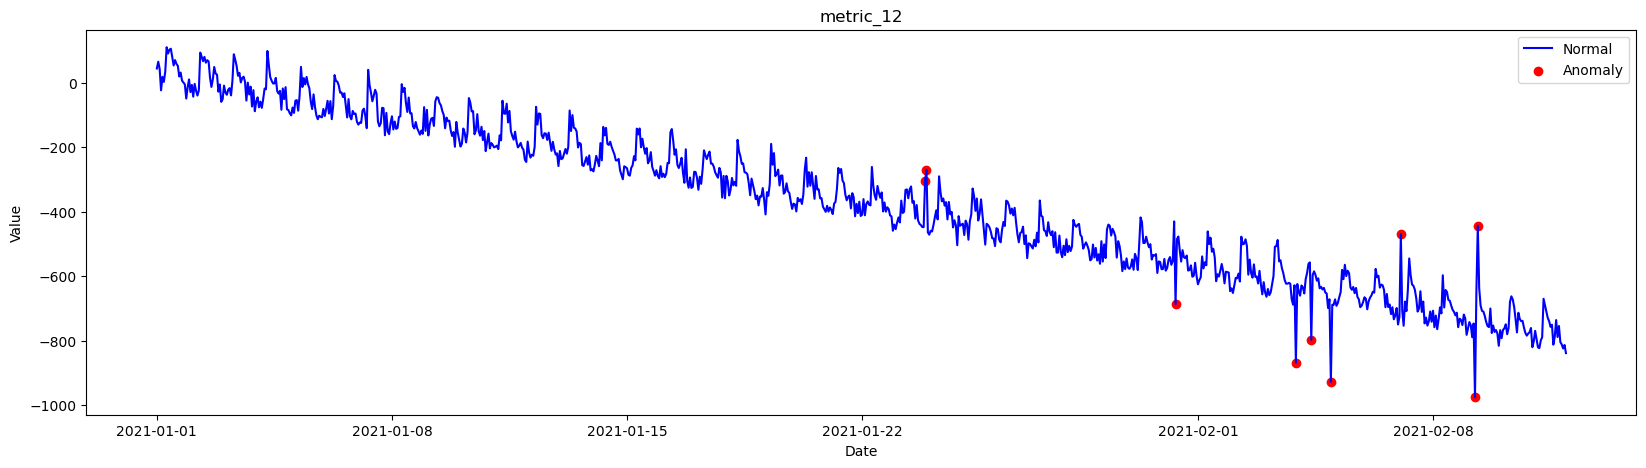

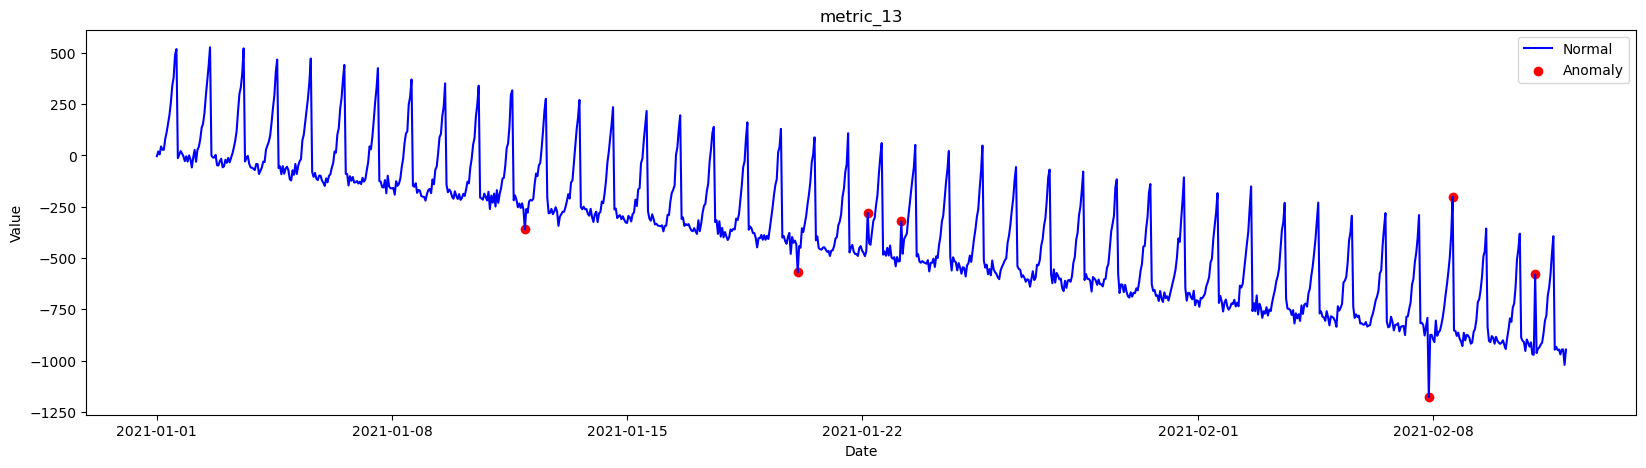

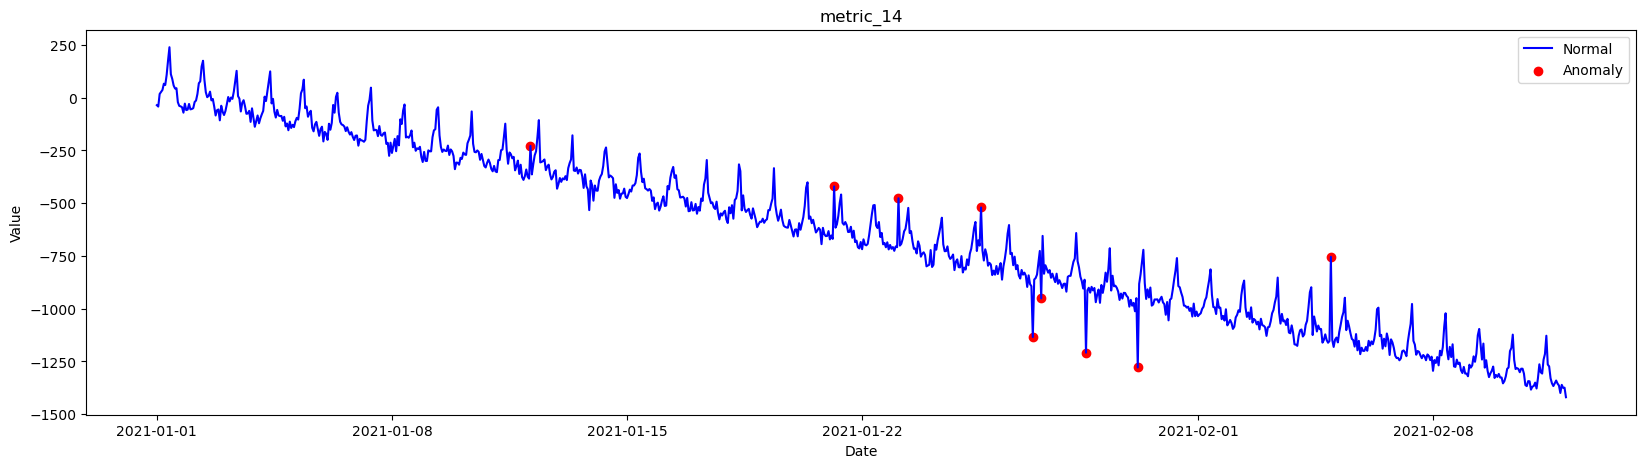

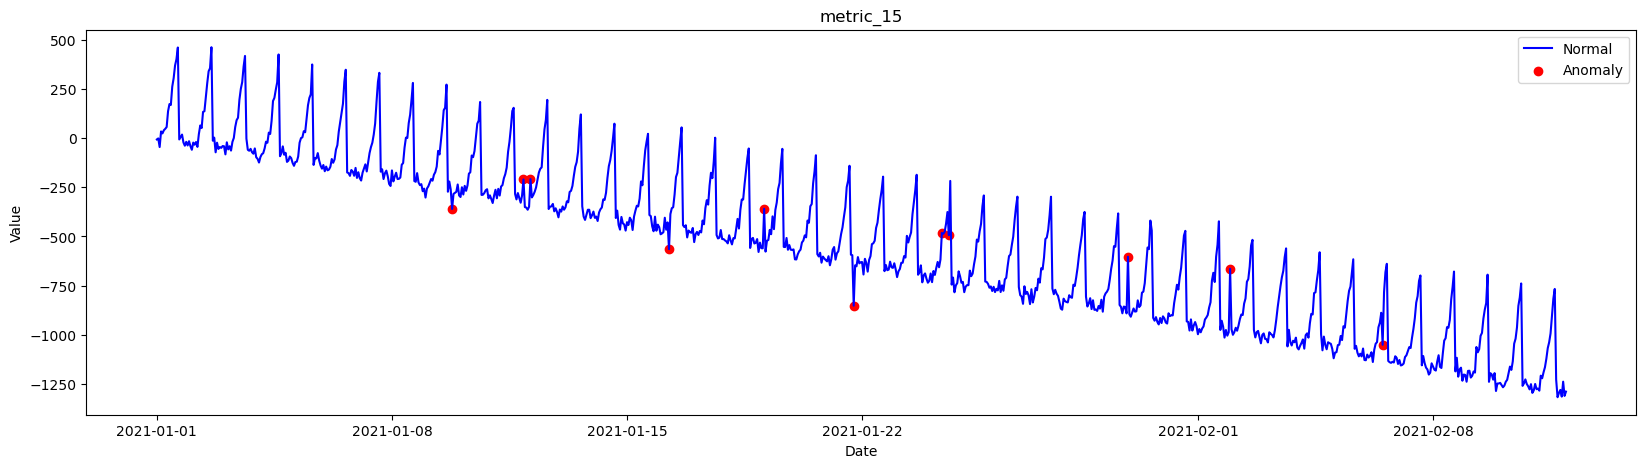

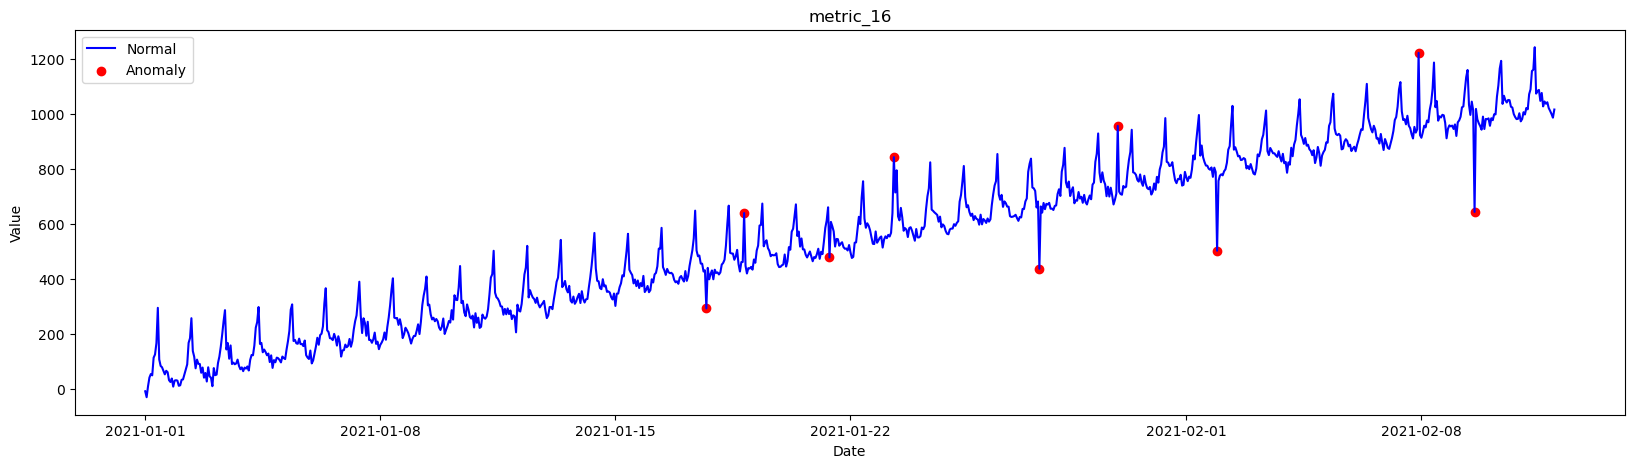

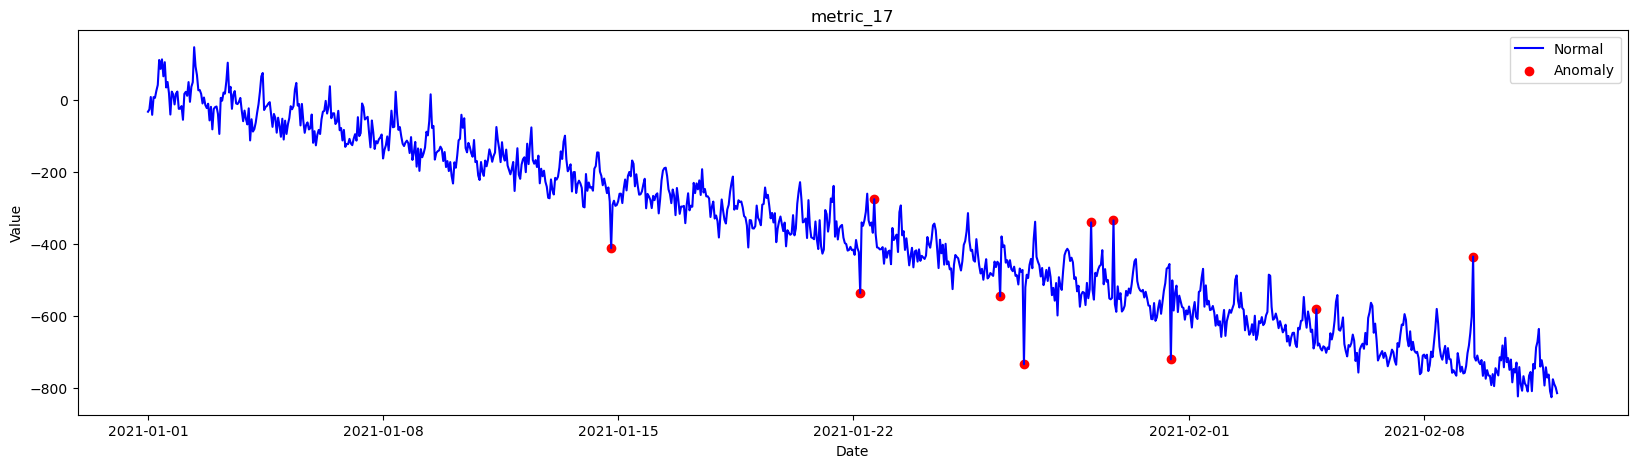

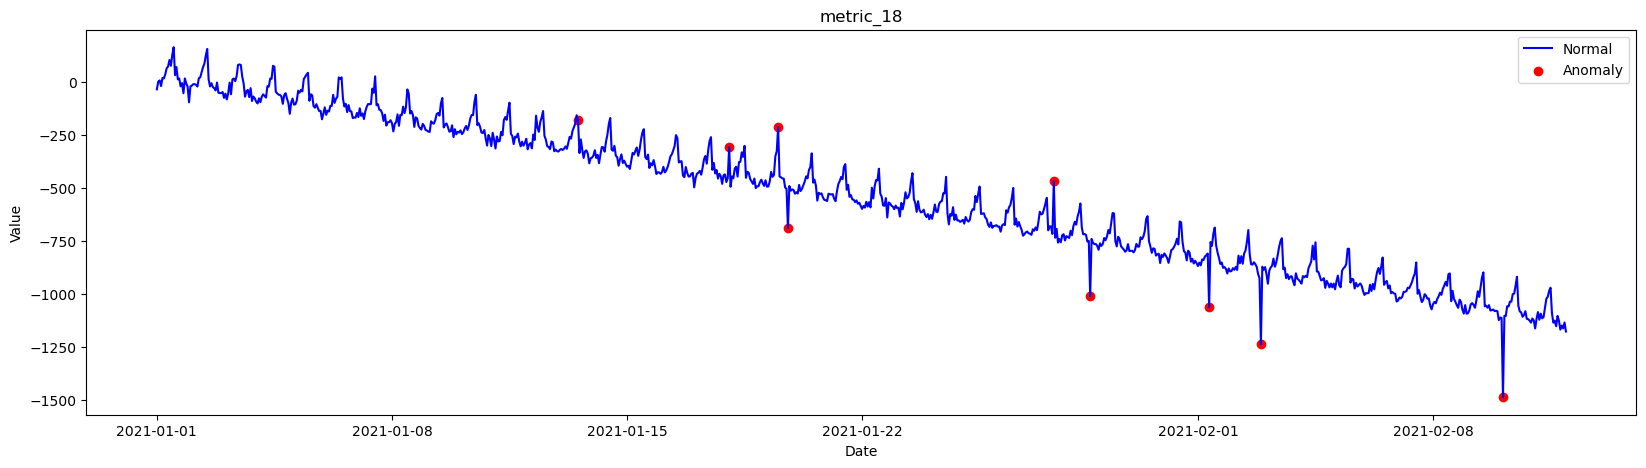

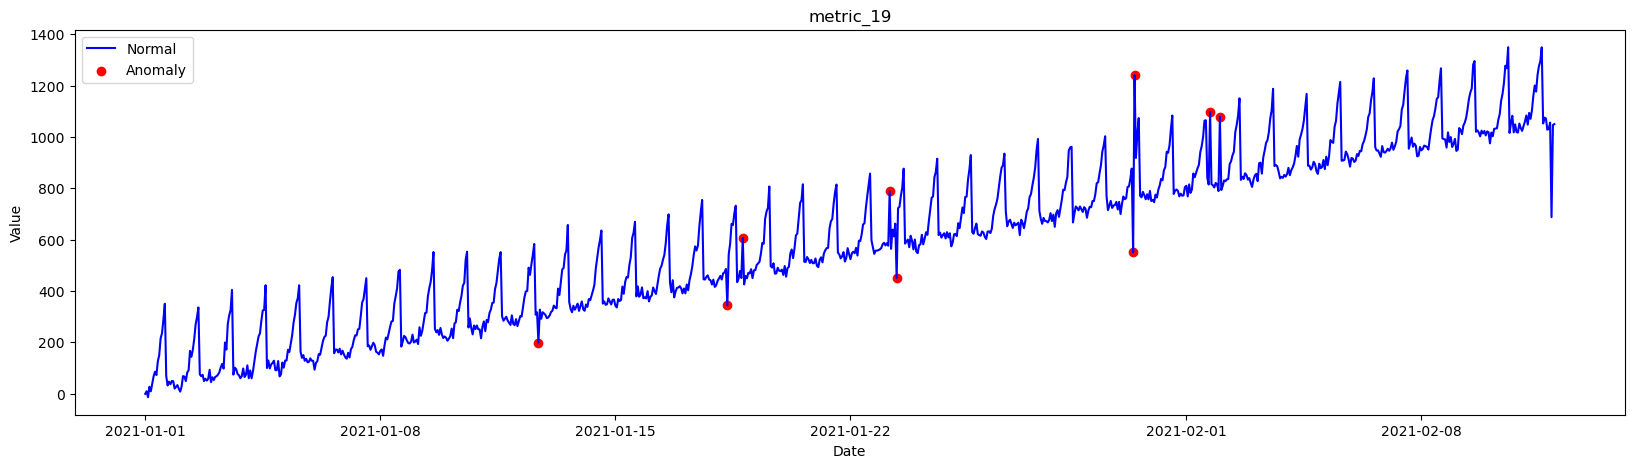

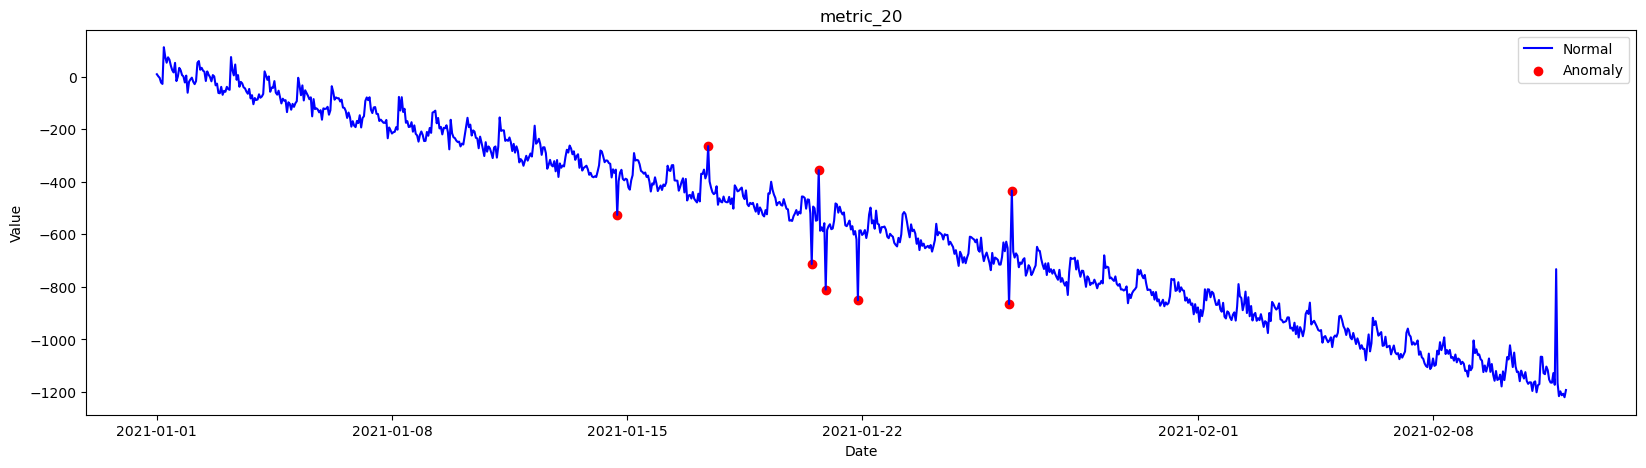

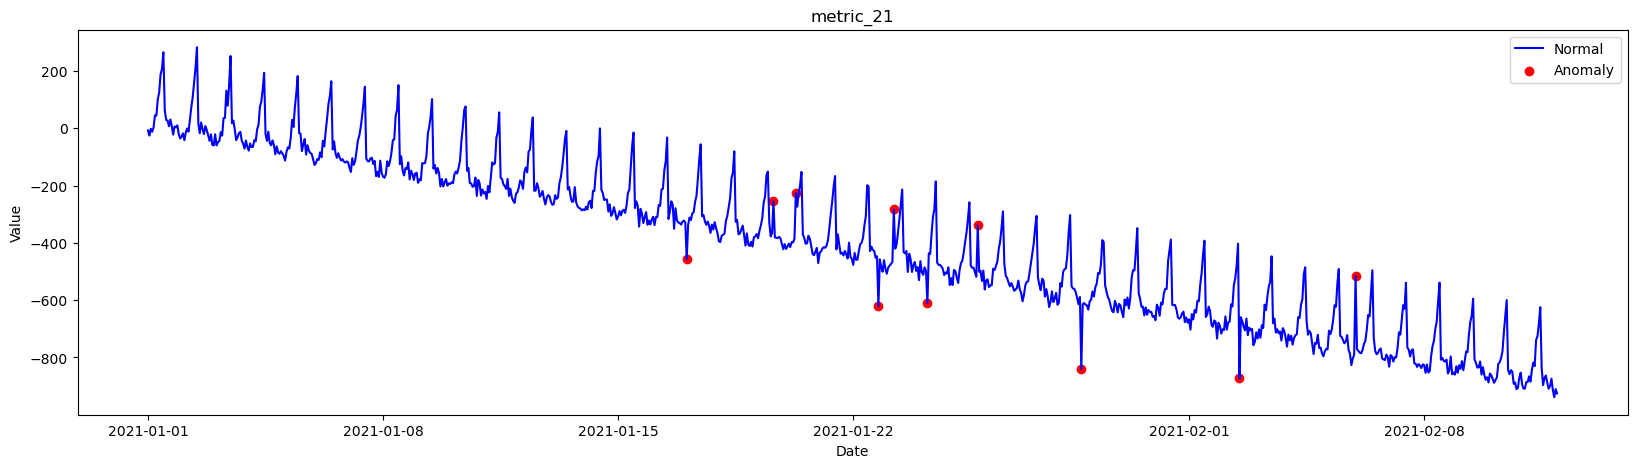

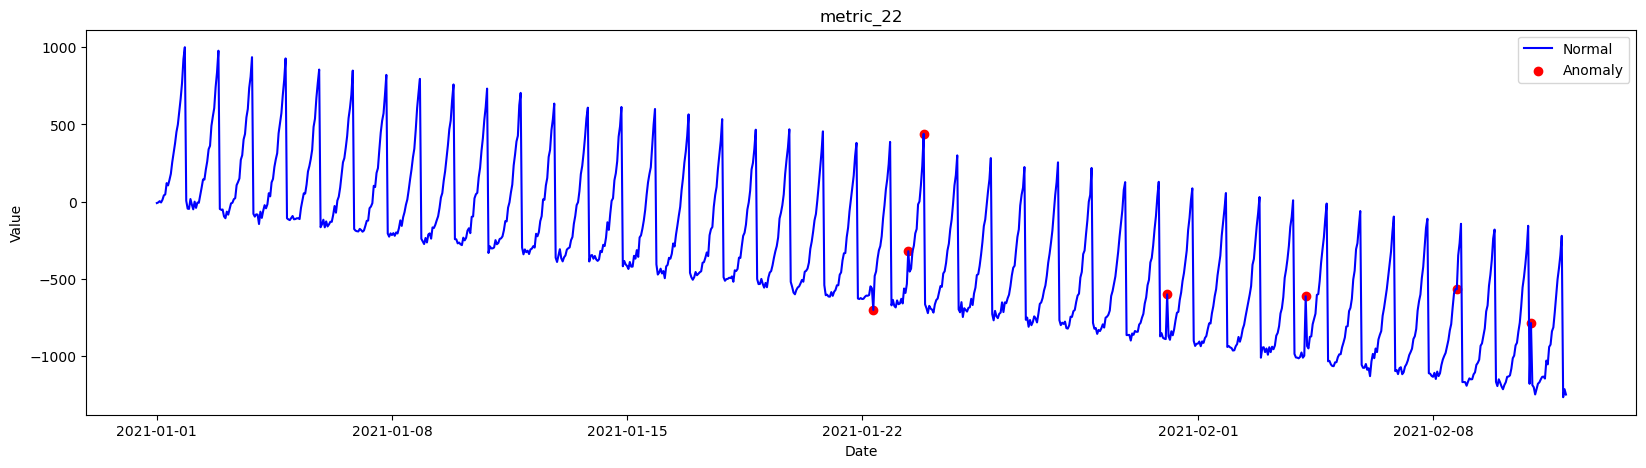

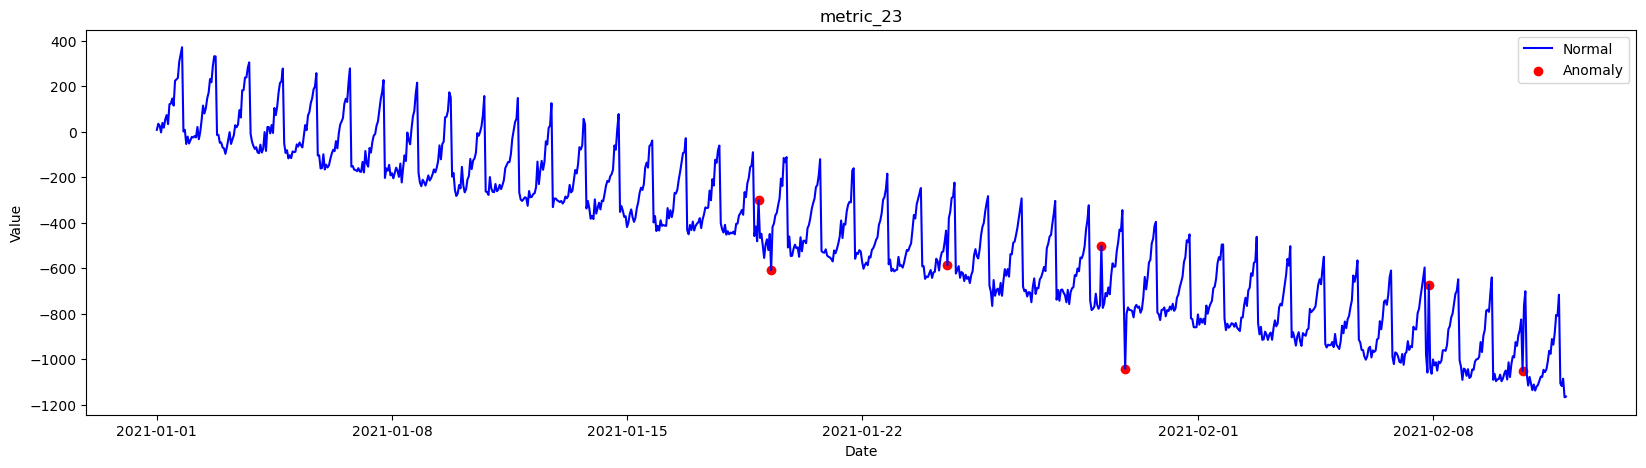

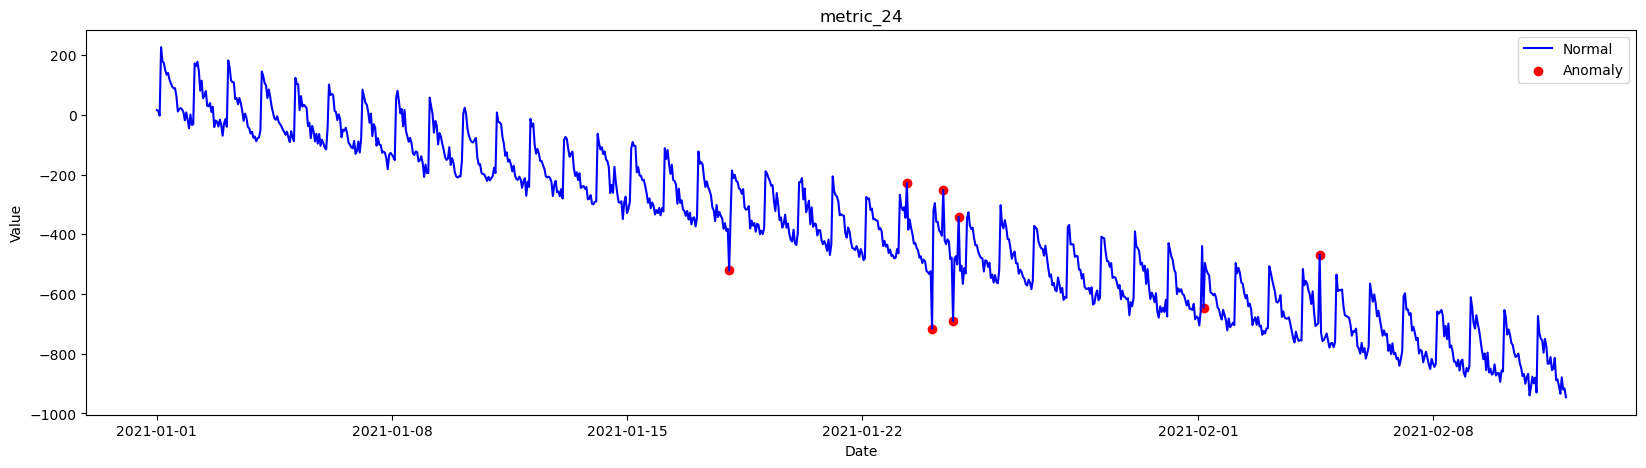

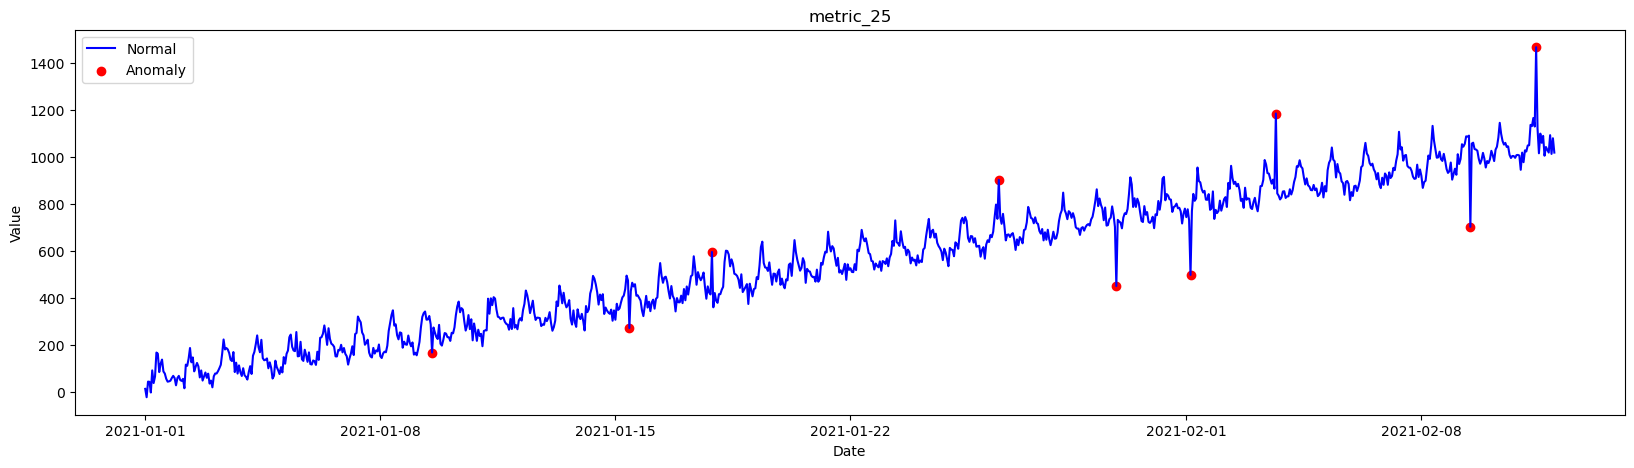

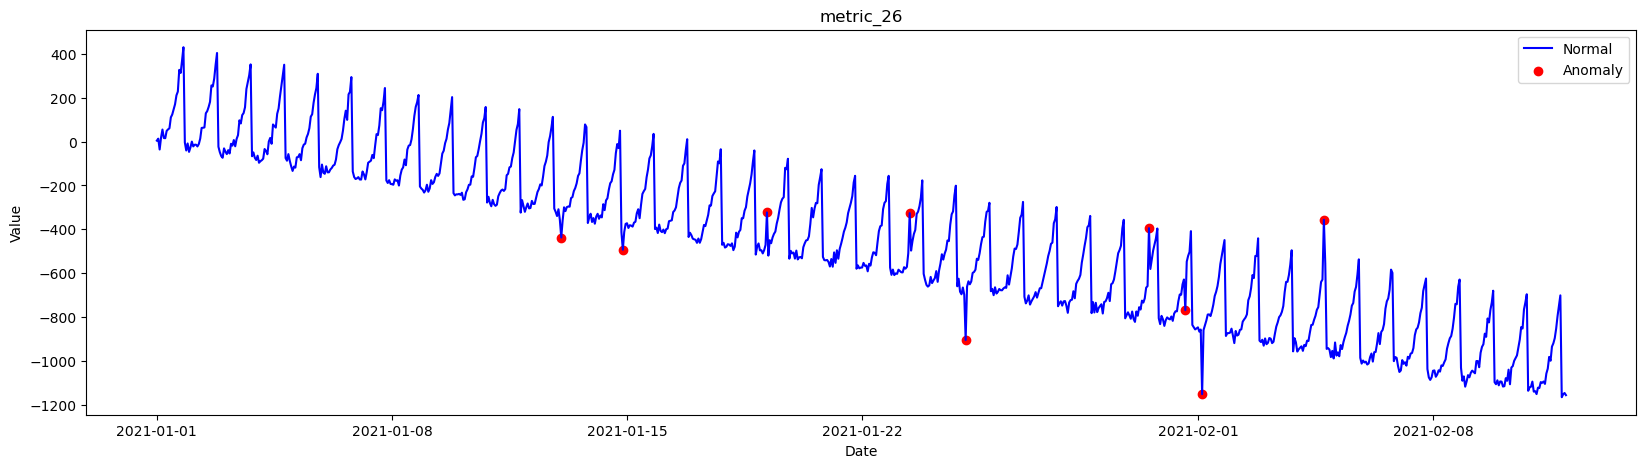

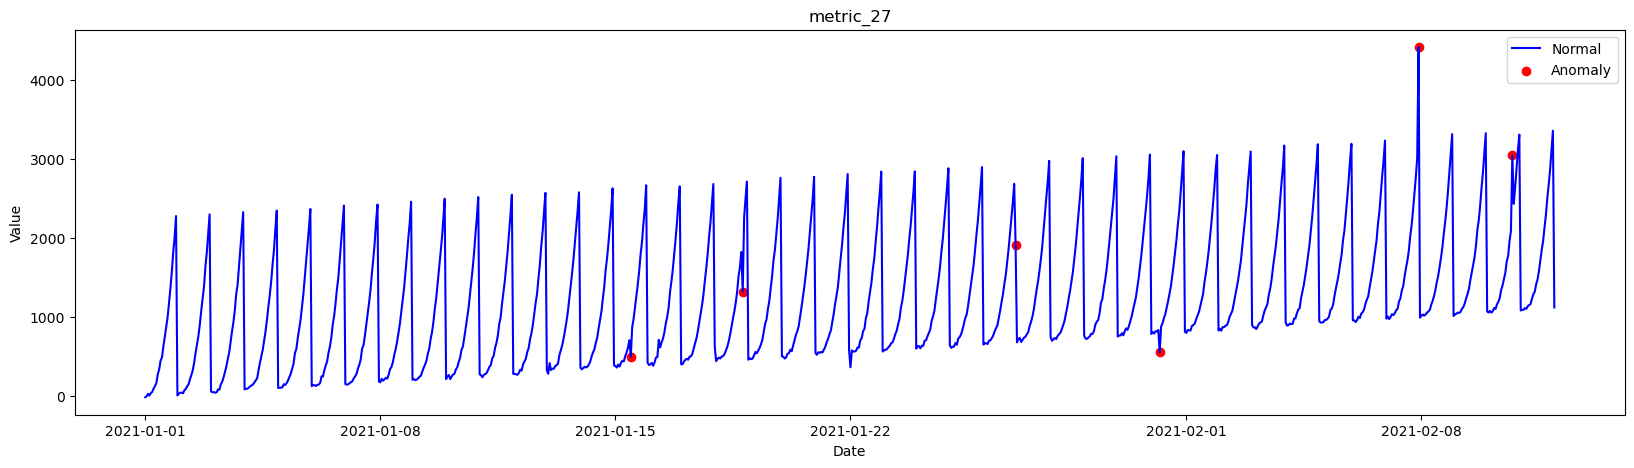

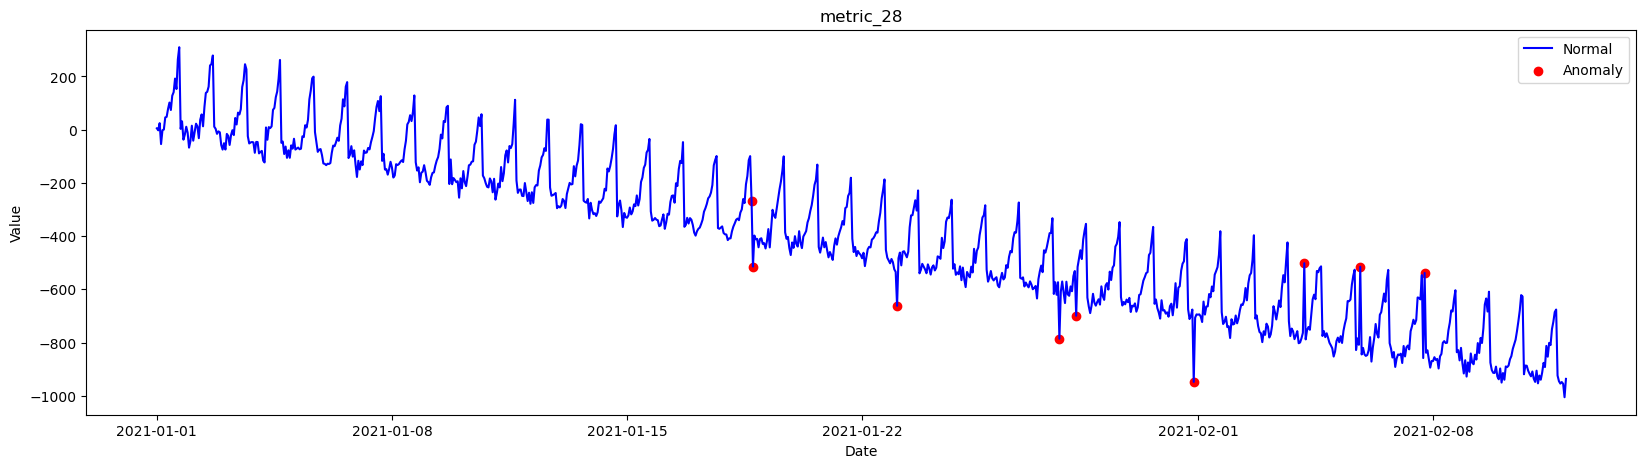

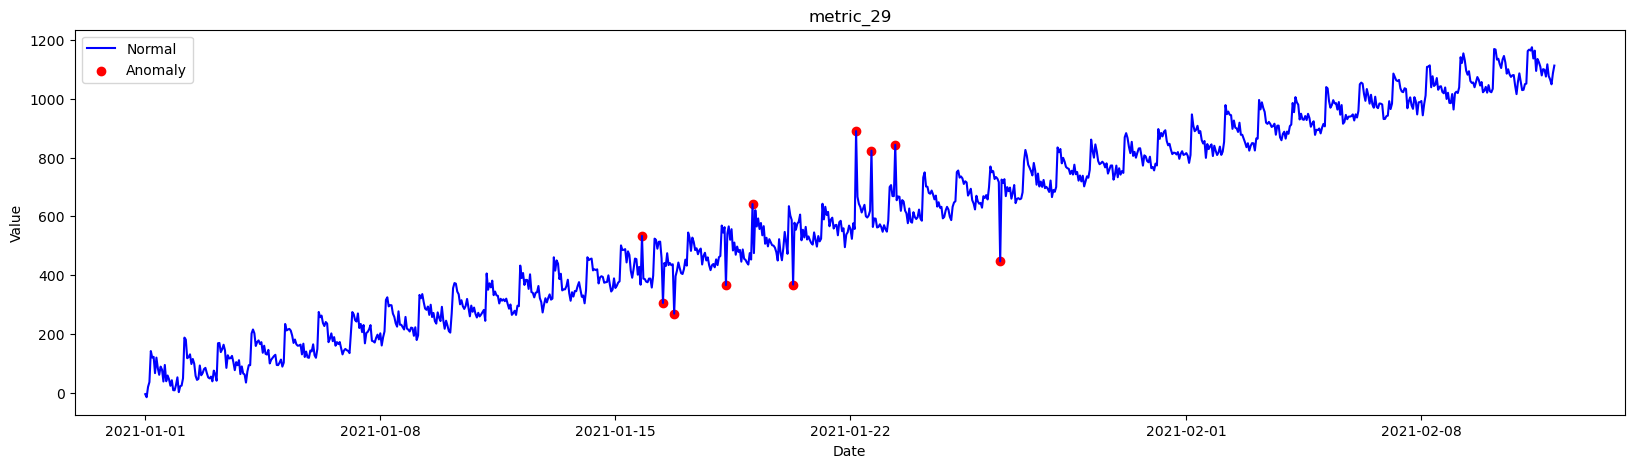

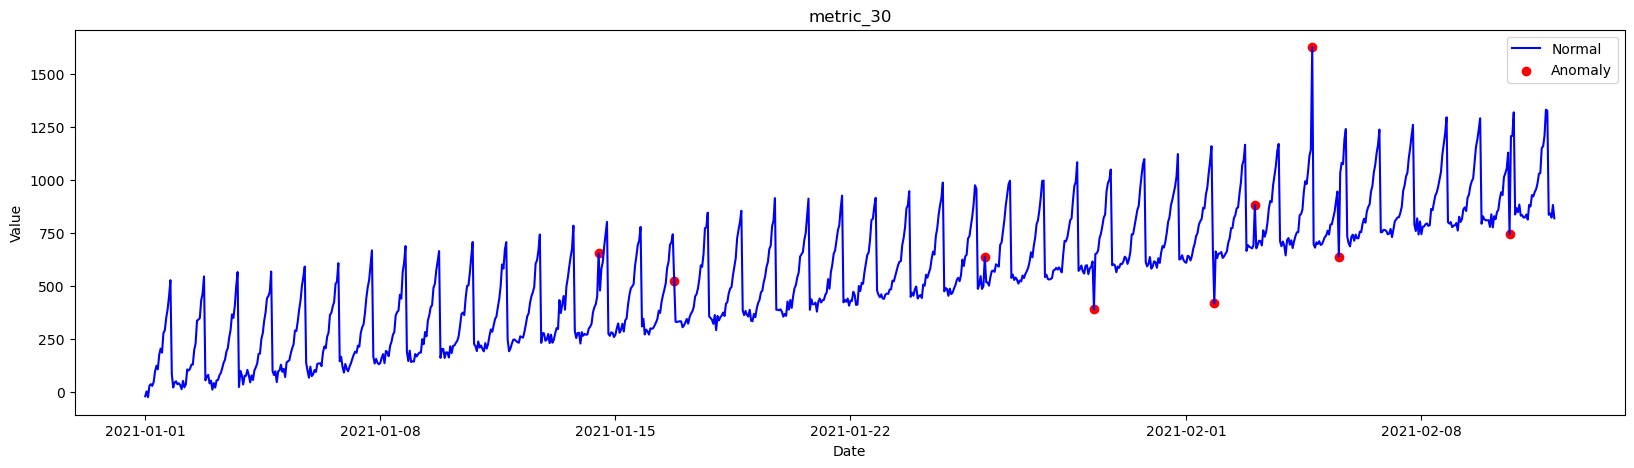

In [4]:
for col in df.columns:
    # apply STL decomposition
    res = sm.tsa.seasonal_decompose(df[col], model='additive', period=24)
    residuals = pd.DataFrame({'residuals': res.resid}, index=data.index)
    
    
    # calculate  zscore  
    residuals['col_zscore'] = ((residuals['residuals'] - residuals['residuals'].mean())/residuals['residuals'].std(ddof=0))
    
    # calculate upper and lower bounds
    lower_bound = -3
    upper_bound = 3
    
    
    anomalies = residuals[(residuals['col_zscore'] < lower_bound) | (residuals['col_zscore'] > upper_bound)]
    
    # find anomalies
    
    top_n = int(np.ceil(len(data) * 2 / 100))
    top_n_outliers = anomalies.sort_values(by='residuals', ascending=False).head(top_n)
    
    
    
    # plot results
    fig, ax = plt.subplots(figsize=(20,5))
    ax.plot(df.index, df[col], color='blue', label='Normal')
    ax.scatter(top_n_outliers.index, df.loc[top_n_outliers.index, col], color='red', label='Anomaly')
    plt.title(col)
    plt.xlabel('Date')
    plt.ylabel('Value')
    plt.legend()
    
    #saving plots
    #col_name = col.replace("/", " divided by ")
    #plt.savefig(col_name + '_rolling_zscore_plot.png')
    
    plt.show()
